Linear Regression -> MSE: 53284.80, R2: 0.20
Decision Tree -> MSE: 110660.77, R2: -0.66
Random Forest -> MSE: 53979.94, R2: 0.19
Gradient Boosting -> MSE: 47362.79, R2: 0.29


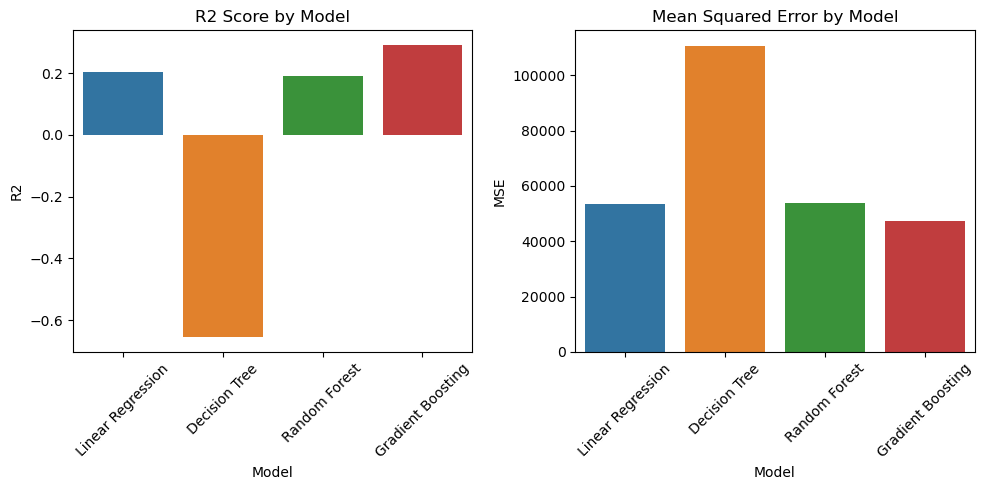

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# 3. Preprocess Data
df_encoded = df.copy()
le = LabelEncoder()
for column in df_encoded.select_dtypes(include='object').columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])

X = df_encoded.drop('duration', axis=1)
y = df_encoded['duration']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Train Regression Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} -> MSE: {mse:.2f}, R2: {r2:.2f}")

# 5. Visualize Performance
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.barplot(data=results_df, x='Model', y='R2')
plt.title('R2 Score by Model')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=results_df, x='Model', y='MSE')
plt.title('Mean Squared Error by Model')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# 3. Preprocess Data
df_encoded = df.copy()
le = LabelEncoder()
for column in df_encoded.select_dtypes(include='object').columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])

X = df_encoded.drop('duration', axis=1)
y = df_encoded['duration']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Train Regression Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} -> MSE: {mse:.2f}, R2: {r2:.2f}")

# 5. Visualize Performance
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.barplot(data=results_df, x='Model', y='R2')
plt.title('R2 Score by Model')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=results_df, x='Model', y='MSE')
plt.title('Mean Squared Error by Model')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# Display the results
print("Model Performance Comparison:")
print(results_df)

# Plot model performance
plt.figure(figsize=(10, 5))
results_df[['MSE', 'MAE']].plot(kind='bar', figsize=(10, 5), title='Model Performance Metrics')
plt.ylabel("Error")
plt.xlabel("Regression Models")
plt.xticks(rotation=45)
plt.legend()
plt.show()
best_model = results_df.sort_values(by=["R**", "MSE", "MAE"], ascending=[False, True, True]).index[0]
worst_model = results_df.sort_values(by=["R**", "MSE", "MAE"], ascending=[True, False, False]).index[0]


Linear Regression -> MSE: 53284.80, R2: 0.20
Decision Tree -> MSE: 110660.77, R2: -0.66
